# China/PLP trocas comerciais

A partir dos dados da base comtrade das Nações Unidas

## Inicialização

Ver [aqui](0-comtrade-setup-first.ipynb) para instruções como obter chave de acesso APIKEY.
A APIKEY que dá acesso a mais de 500 linhas de
resultados.


In [1]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=True)

INFO:root:Downloading codebook from https://raw.githubusercontent.com/joaquimrcarvalho/cipf-comtrade/main/support/codebook.xlsx
INFO:root:Downloading country groups from https://unctadstat.unctad.org/EN/Classifications/Dim_Countries_Hierarchy_UnctadStat_All_Flat.csv


un-comtrade codebook downloaded to support/codebook.xlsx
un-comtrade country groups downloaded to support/Dim_Countries_Hierarchy_UnctadStat_All_Flat.csv


INFO:root:Loading HS codes from support/harmonized-system.csv


## Parâmetros gerais que não mudam



In [2]:
from comtradetools import COUNTRY_CODES_REVERSE as m49

In [3]:
from comtradetools import encode_country 

from comtradetools import encode_country 

angola = encode_country('Angola')
brazil = encode_country('Brazil')
cabo_verde = encode_country('Cabo Verde')
china = encode_country('China')
hong_kong = encode_country('China, Hong Kong SAR')
macau = encode_country('China, Macao SAR')
taiwan = encode_country('Taiwan, Province of China')
guine_equatorial = encode_country('Equatorial Guinea')
guine_bissau = encode_country('Guinea-Bissau')
mozambique = encode_country('Mozambique')
portugal = encode_country('Portugal')
stome_principe = encode_country('Sao Tome and Principe')
timor = encode_country('Timor-Leste')

# make list of Portuguese Speaking Countries
plp = [angola, brazil, cabo_verde, guine_bissau,
       guine_equatorial, mozambique, portugal,
       stome_principe, timor]
plp_list = ",".join(map(str, plp))

# make list of Portuguese Speaking Countries
plp = [angola, brazil, cabo_verde, guine_bissau,
       guine_equatorial, mozambique, portugal,
       stome_principe, timor]
plp_list = ",".join(map(str, plp))



## Parâmetros para visualização

Definir as colunas a visualizar, ordem das linhas abaixo para simplificar
posterior visualização dos dados.

### Descrição das colunas 

In [4]:
import comtradetools as comtrade

print(comtrade.DATA_ITEM_DF.to_markdown())


|    | dataItem                 | description                                                                              | isInDataAPICommodity   | isInDataAPIServices   | isInBulkFileFinal   | isInBulkFileTariffline   |
|---:|:-------------------------|:-----------------------------------------------------------------------------------------|:-----------------------|:----------------------|:--------------------|:-------------------------|
|  0 | datasetCode              | Combination of several keys to identify specific datasetCode                             | True                   | True                  | True                | True                     |
|  1 | typeCode                 | Product type: Goods or Services                                                          | True                   | True                  | True                | True                     |
|  2 | freqCode                 | The time interval at which observations occur                             

Lista de colunas

In [5]:
import comtradetools as comtrade

cols_all = comtrade.DATA_ITEM_DF.dataItem.unique()
cols_all

array(['datasetCode', 'typeCode', 'freqCode', 'refPeriodId', 'refYear',
       'refMonth', 'period', 'reporterCode', 'reporterISO',
       'reporterDesc', 'flowCategory', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationSearchCode',
       'classificationCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'mosDesc', 'motCode', 'motDesc', 'qtyUnitCode',
       'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode',
       'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt',
       'isnetWgtEstimated', 'grossWgt', 'isgrossWgtEstimated', 'cifValue',
       'fobValue', 'primaryValue', 'legacyEstimationFlag', 'isReported',
       'isAggregate'], dtype=object)

## Cobertura dos dados: importações/exportações Hong Kong-PLP anos disponíveis

Tendo a China como "reporter".

In [7]:
import time
import comtradetools
import pandas as pd

comtradetools.init(APIKEY)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

flow = "M,X"

year_start = 2003
year_end = 2023
years_of_interest = comtradetools.year_range(year_start, year_end)

periods = comtradetools.split_period(years_of_interest,12)
df = pd.DataFrame()
for period in periods:

    temp = comtradetools.getFinalData(APIKEY,
                        typeCode="C",# C for commodities, S for Services
                        freqCode="A",# (freqCode) A for annual and M for monthly
                        clCode="HS",
                        cmdCode="TOTAL",
                        flowCode=flow,
                        reporterCode=hong_kong,
                        partnerCode=plp_list,
                        partner2Code=None,
                        customsCode=None,
                        motCode=None,
                        period=period,
                        includeDesc=True
        )
    df = pd.concat([df,temp])


INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


In [7]:
from comtradetools import get_year_intervals
for country in df.partnerDesc.unique():
    years = sorted(df[df.partnerDesc == country]['refYear'].unique())
    print(country, get_year_intervals(years)),

Angola ['2003-2022']
Brazil ['2003-2022']
Cabo Verde ['2003-2022']
Equatorial Guinea ['2003-2022']
Mozambique ['2003-2022']
Portugal ['2003-2022']
Guinea-Bissau ['2003-2022']
Timor-Leste ['2003-2022']
Sao Tome and Principe ['2003-2022']


## Directoria para relatórios e gráficos

In [8]:
from pathlib import Path

report_dir = 'reports'
Path(report_dir).mkdir(parents=True, exist_ok=True)

## Hong Kong e PLP: importações, exportações, volume, saldos

O Forum Macau inclui desde 2016 um quadro sumário
dos dados das trocas comerciais entre a China e 
os PLP. Ver https://www.forumchinaplp.org.mo/pt/publications-data-4/annual-reports/

Aqui reproduzimos os quadros para Hong Kong

>NOTA: Tal como nos quadros do Forum os valores são
apresentados em 10 mil USD

In [9]:
import comtradetools as comtrade
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f} $10mil'.format

flow = "M,X"
partnerCode = comtrade.m49_plp_list
periods = comtrade.split_period(years_of_interest,12)
df = pd.DataFrame()
for period in periods:
    print(f"Fetching data for period {period}")

    temp = comtrade.getFinalData(APIKEY,
                                typeCode="C",# C for commodities, S for Services
                                freqCode="A",# (freqCode) A for annual and M for monthly
                                    flowCode=flow,
                                    reporterCode=comtrade.m49_hong_kong,
                                    partnerCode=partnerCode,
                                    cmdCode='TOTAL',
                                    period=period,
                                    partner2Code=0,
                                    clCode="HS",
                                    customsCode='C00',
                                    motCode='0',
                                    includeDesc=True
                         )
    df = pd.concat([df,temp])


INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014


Fetching data for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014


INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


Fetching data for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


In [10]:

temp=df.pivot(index=['refYear','partnerDesc',],columns='flowCode',values='primaryValue')
temp['C'] = temp['M'] + temp['X']
temp['S'] = temp['X']-temp['M']
forum_type = temp[['C','X','M','S']]
forum_type.columns=['Trocas','Exportações','Importações','Saldo']
forum_type.div(10000).fillna("-")


Trocas       Exportações  \
refYear partnerDesc                                                 
2003    Angola                  2,210.36 $10mil   2,158.12 $10mil   
        Brazil                132,475.33 $10mil  57,046.68 $10mil   
        Cabo Verde                 55.03 $10mil      55.03 $10mil   
        Equatorial Guinea                     -     114.58 $10mil   
        Guinea-Bissau              16.04 $10mil       5.78 $10mil   
        Mozambique              2,545.45 $10mil     936.32 $10mil   
        Portugal               17,229.75 $10mil  12,082.18 $10mil   
        Sao Tome and Principe       4.98 $10mil       4.58 $10mil   
2004    Angola                  1,891.74 $10mil   1,846.57 $10mil   
        Brazil                171,133.17 $10mil  83,378.18 $10mil   
        Cabo Verde                 38.71 $10mil      35.23 $10mil   
        Equatorial Guinea                     -     325.68 $10mil   
        Guinea-Bissau              12.97 $10mil      12.95 $10mil   
        Mozambique              1,616.79 $10mil     454.81 $10mil   
        Portugal               21,433.13 $10mil  15,011.51 $10mil   
        Sao Tome and Principe                 -      10.58 $10mil   
2005    Angola                 11,654.18 $10mil   2,865.75 $10mil   
        Brazil                192,351.31 $10mil 100,376.19 $10mil   
        Cabo Verde                 64.74 $10mil      64.65 $10mil   
        Equatorial Guinea         237.29 $10mil     237.05 $10mil   
        Guinea-Bissau              30.63 $10mil       5.53 $10mil   
        Mozambique                672.21 $10mil     388.25 $10mil   
        Portugal               28,629.79 $10mil  18,334.72 $10mil   
        Sao Tome and Principe       5.08 $10mil       4.12 $10mil   
2006    Angola                 18,228.37 $10mil   3,205.46 $10mil   
        Brazil                225,814.09 $10mil 117,489.44 $10mil   
        Cabo Verde                            -      13.31 $10mil   
        Equatorial Guinea         244.08 $10mil     244.07 $10mil   
        Guinea-Bissau               7.63 $10mil       5.59 $10mil   
        Mozambique                598.21 $10mil     380.97 $10mil   
        Portugal               27,592.93 $10mil  18,080.66 $10mil   
        Sao Tome and Principe      17.06 $10mil      16.87 $10mil   
2007    Angola                  9,317.27 $10mil   4,335.28 $10mil   
        Brazil                275,933.18 $10mil 133,059.05 $10mil   
        Cabo Verde                 11.05 $10mil      10.96 $10mil   
        Equatorial Guinea         161.15 $10mil     157.57 $10mil   
        Guinea-Bissau             520.43 $10mil     435.77 $10mil   
        Mozambique              1,044.82 $10mil     243.00 $10mil   
        Portugal               30,953.19 $10mil  24,831.13 $10mil   
        Sao Tome and Principe       4.54 $10mil       1.73 $10mil   
2008    Angola                 18,597.23 $10mil   6,431.38 $10mil   
        Brazil                347,346.47 $10mil 164,749.33 $10mil   
        Cabo Verde                            -      15.67 $10mil   
        Equatorial Guinea                     -     105.79 $10mil   
        Guinea-Bissau              26.71 $10mil      14.92 $10mil   
        Mozambique              1,453.92 $10mil     382.21 $10mil   
        Portugal               35,382.52 $10mil  27,389.81 $10mil   
        Sao Tome and Principe       5.05 $10mil       3.26 $10mil   
2009    Angola                 18,790.54 $10mil   5,430.48 $10mil   
        Brazil                311,783.92 $10mil 117,970.84 $10mil   
        Cabo Verde                            -       5.80 $10mil   
        Equatorial Guinea         146.22 $10mil     145.43 $10mil   
        Guinea-Bissau              72.49 $10mil      46.78 $10mil   
        Mozambique              1,681.37 $10mil     598.36 $10mil   
        Portugal               26,283.55 $10mil  19,516.09 $10mil   
        Sao Tome and Principe       0.28 $10mil       0.14 $10mil   
2010    Angola                  3,258.3

### Gravar em Excel

- [ ] formatar em Excel largura das colunas e formato dos números. Ver cn_plp_commodities.ipynb

In [11]:
real_period = forum_type.index.get_level_values('refYear')
start_year=min(real_period)
end_year=max(real_period)
period=f"{start_year}-{end_year}"
forum_type.reset_index().to_excel(f"./reports/hk_plp_trocas_{period}.xlsx", index=False)


## Gráficos dos valores das importações e exportações, trocas e saldos

### Gráficos das trocas comerciais (importações + exportações)

In [12]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Trocas' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento         Trocas                                                   \
Parceiro          Angola           Brazil    Cabo Verde Equatorial Guinea   
refYear                                                                     
2003       22,103,596.00 1,324,753,283.00    550,302.00               NaN   
2004       18,917,382.00 1,711,331,736.00    387,126.00               NaN   
2005      116,541,765.00 1,923,513,088.00    647,378.00      2,372,934.00   
2006      182,283,732.00 2,258,140,892.00           NaN      2,440,847.00   
2007       93,172,673.00 2,759,331,822.00    110,514.00      1,611,457.00   
2008      185,972,259.00 3,473,464,705.00           NaN               NaN   
2009      187,905,361.00 3,117,839,169.00           NaN      1,462,243.00   
2010       32,583,492.00 3,438,693,788.00    476,347.00               NaN   
2011       38,805,223.00 4,161,148,299.00  2,521,284.00      4,727,433.00   
2012      168,082,529.00 4,297,105,049.00  3,900,171.00      6,373,378.00   
2013       78,290,151.00 4,701,166,050.00  9,760,328.00      1,892,708.00   
2014      173,621,276.00 5,121,096,978.00  6,008,031.00               NaN   
2015      121,042,824.48 3,515,093,074.20 10,465,994.69      2,396,115.91   
2016       25,227,926.69 3,601,355,666.97  1,632,034.63      1,083,840.44   
2017      209,937,422.59 3,990,790,278.33  6,205,821.04        399,776.47   
2018       68,282,058.87 4,339,392,883.50  1,944,346.82      2,387,585.09   
2019       55,626,039.18 4,121,395,499.28  1,133,517.01      1,408,608.15   
2020       28,596,501.91 4,481,387,881.71           NaN               NaN   
2021       43,407,330.67 4,460,065,347.27           NaN        717,259.01   
2022      158,786,234.64 3,519,159,103.74           NaN        239,968.19   

Movimento                                                                   \
Parceiro  Guinea-Bissau    Mozambique       Portugal Sao Tome and Principe   
refYear                                                                      
2003         160,400.00 25,454,474.00 172,297,466.00             49,787.00   
2004         129,697.00 16,167,887.00 214,331,273.00                   NaN   
2005         306,276.00  6,722,095.00 286,297,873.00             50,824.00   
2006          76,276.00  5,982,100.00 275,929,254.00            170,626.00   
2007       5,204,284.00 10,448,196.00 309,531,926.00             45,422.00   
2008         267,094.00 14,539,219.00 353,825,183.00             50,530.00   
2009         724,915.00 16,813,653.00 262,835,495.00              2,753.00   
2010         388,462.00 19,288,968.00 310,732,507.00             84,101.00   
2011       1,451,473.00 23,345,358.00 369,103,158.00            361,050.00   
2012         498,498.00 31,950,718.00 363,893,190.00             38,519.00   
2013                NaN 46,053,758.00 364,234,226.00                   NaN   
2014                NaN 79,712,391.00 427,380,491.00          2,153,285.00   
2015                NaN 58,047,433.47 378,612,133.07          2,002,495.25   
2016       1,282,170.88 36,724,184.51 439,097,615.66          1,245,688.57   
2017       2,038,610.13 55,057,890.70 495,602,418.06            800,619.90   
2018       2,317,571.33 41,055,243.72 522,513,739.98                   NaN   
2019         894,289.33 56,986,212.91 443,377,013.89                   NaN   
2020                NaN 53,011,103.69 428,016,466.97                   NaN   
2021         879,404.95 77,744,409.00 474,088,390.97                   NaN   
2022                NaN 38,711,334.23 447,145,847.12                   NaN   

Movimento               
Parceiro   Timor-Leste  
refYear                 
2003               NaN  
2004               NaN  
2005               NaN  
2006               NaN  
2007               NaN  
2008               NaN  
2009               NaN  
2010               NaN  
2011               NaN  
2012               NaN  
2013               NaN  
2014               NaN  
2015               NaN  
2016               NaN  
2017    

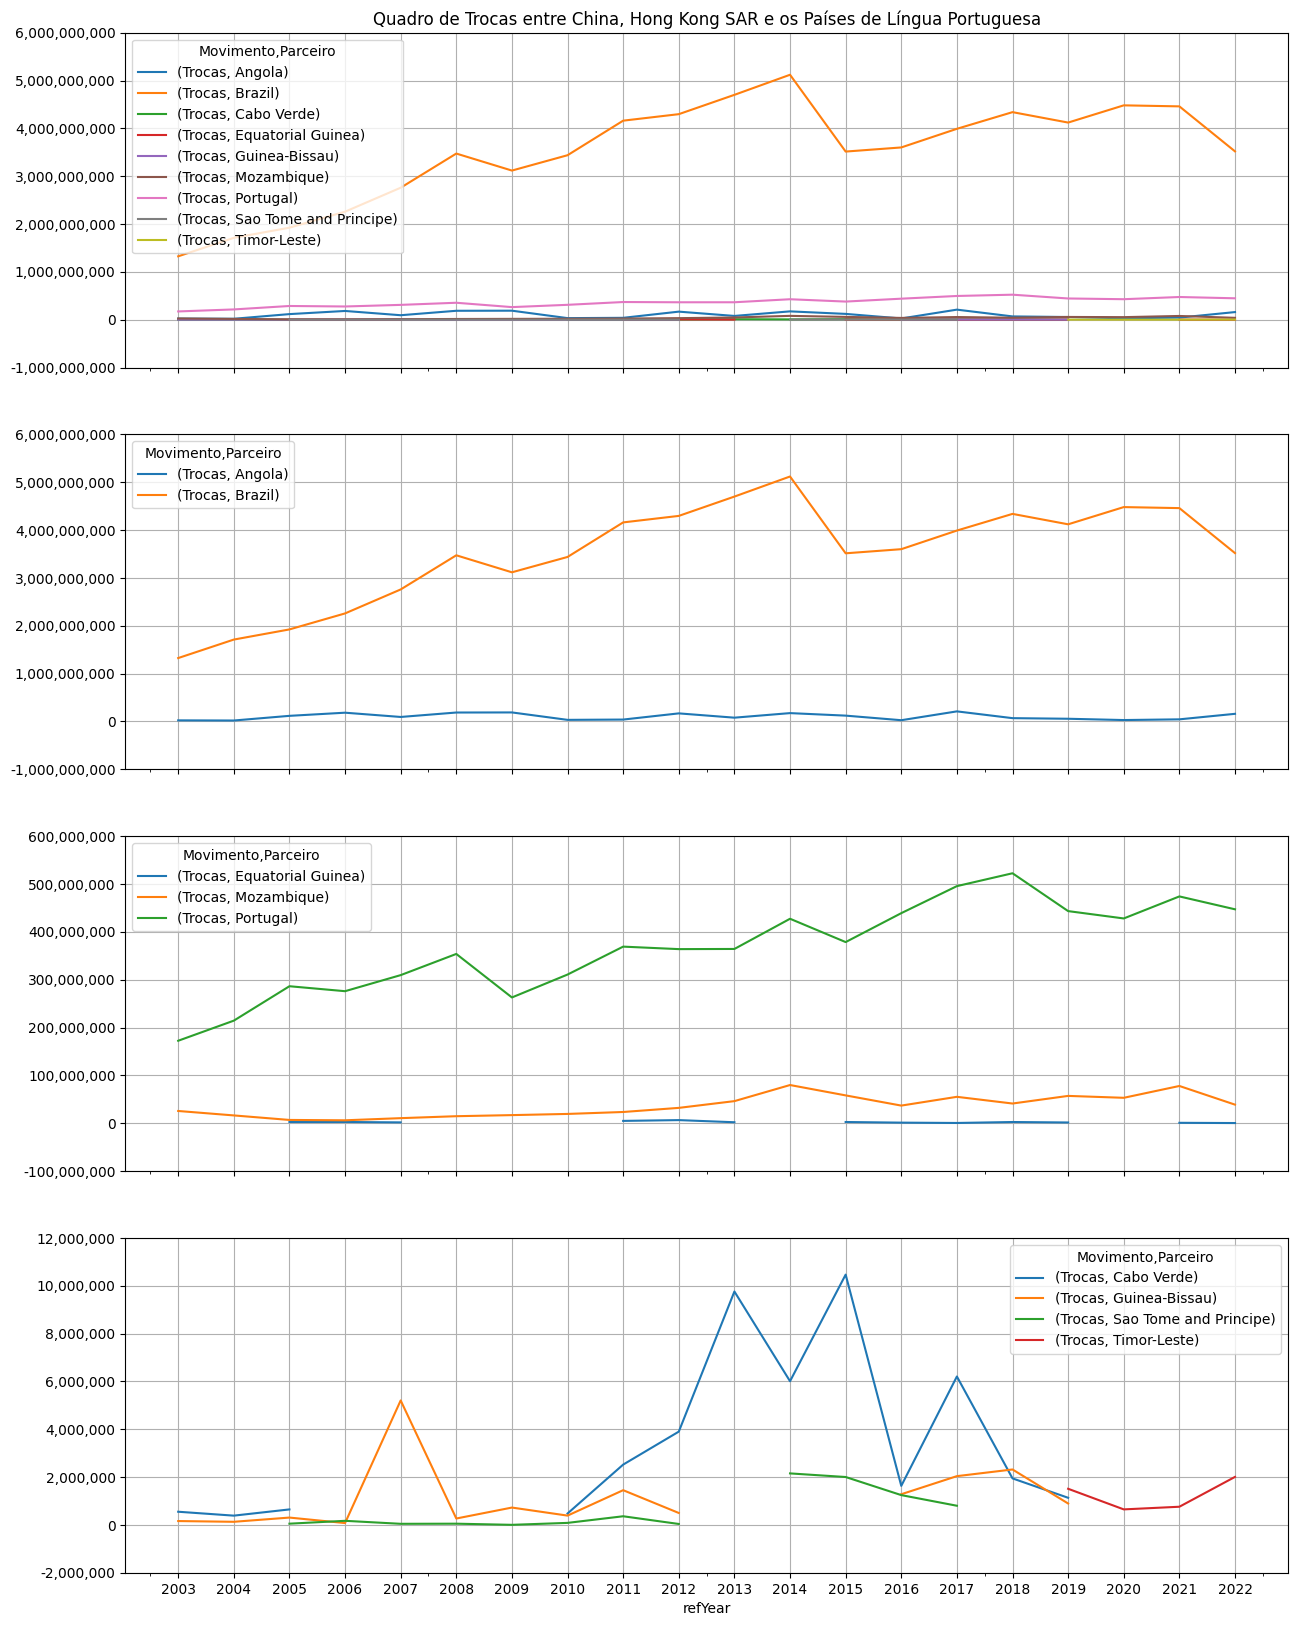

In [13]:
import matplotlib.pyplot as plt

title=f"Quadro de {movimento} entre {comtrade.COUNTRY_CODES[comtrade.m49_hong_kong]} e os Países de Língua Portuguesa"

# Define the line styles
line_styles = ['-', '--', '-.', ':']

size=(15,20)
figure,axis = plt.subplots(4,sharex=True,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/hk_plp_{movimento}.png")

### Gráficos importações

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Importações' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento    Importações                                                \
Parceiro          Angola           Brazil Cabo Verde Equatorial Guinea   
refYear                                                                  
2003          522,420.00   754,286,436.00       6.00               NaN   
2004          451,650.00   877,549,967.00  34,849.00               NaN   
2005       87,884,313.00   919,751,232.00     893.00          2,395.00   
2006      150,229,107.00 1,083,246,483.00        NaN            100.00   
2007       49,819,847.00 1,428,741,352.00     903.00         35,718.00   
2008      121,658,472.00 1,825,971,371.00        NaN               NaN   
2009      133,600,550.00 1,938,130,793.00        NaN          7,911.00   
2010        1,150,532.00 1,775,254,004.00     172.00               NaN   
2011        4,477,935.00 2,099,208,072.00   7,884.00            471.00   
2012      106,796,517.00 2,319,758,265.00  10,392.00            631.00   
2013        1,356,775.00 2,740,053,567.00   2,075.00          1,031.00   
2014       18,230,168.00 3,247,115,427.00  66,377.00               NaN   
2015       24,113,479.55 2,139,410,385.38  44,967.48            270.00   
2016        2,046,031.65 2,335,877,435.01   5,619.26            849.11   
2017      183,434,465.25 2,460,634,714.01 278,662.23         71,684.02   
2018       37,074,407.99 2,739,514,685.50 545,365.57          3,003.12   
2019       22,822,892.54 2,251,215,002.65  90,389.43            328.49   
2020           44,188.07 2,234,974,686.88        NaN               NaN   
2021       10,411,574.73 1,956,625,263.86        NaN         49,361.85   
2022      130,234,456.14 1,166,761,541.10        NaN              0.89   

Movimento                                                                   \
Parceiro  Guinea-Bissau    Mozambique       Portugal Sao Tome and Principe   
refYear                                                                      
2003         102,576.00 16,091,289.00  51,475,663.00              3,985.00   
2004             162.00 11,619,809.00  64,216,192.00                   NaN   
2005         250,968.00  2,839,614.00 102,950,693.00              9,581.00   
2006          20,373.00  2,172,366.00  95,122,636.00              1,945.00   
2007         846,603.00  8,018,239.00  61,220,624.00             28,075.00   
2008         117,869.00 10,717,110.00  79,927,038.00             17,908.00   
2009         257,142.00 10,830,031.00  67,674,637.00              1,347.00   
2010          10,170.00 12,408,453.00 105,140,015.00              1,103.00   
2011           3,004.00  4,382,114.00 122,055,631.00                244.00   
2012         118,612.00  6,290,721.00 131,301,720.00              3,025.00   
2013                NaN  3,307,978.00 133,254,154.00                   NaN   
2014                NaN  2,912,436.00 144,997,064.00              6,525.00   
2015                NaN  5,593,105.93 125,260,397.86             64,832.26   
2016             516.48 12,595,272.51 128,159,890.26              2,123.88   
2017             556.00 15,533,205.62 154,937,944.31              6,197.72   
2018           2,551.51  9,420,255.56 147,431,998.28                   NaN   
2019           7,304.83 10,433,892.96 127,120,533.08                   NaN   
2020                NaN 27,501,320.60 107,790,518.68                   NaN   
2021          63,551.53 41,619,133.58 134,378,142.74                   NaN   
2022                NaN 26,796,001.39 129,092,108.49                   NaN   

Movimento              
Parceiro  Timor-Leste  
refYear                
2003              NaN  
2004              NaN  
2005              NaN  
2006              NaN  
2007              NaN  
2008              NaN  
2009              NaN  
2010              NaN  
2011              NaN  
2012              NaN  
2013              NaN  
2014              NaN  
2015              NaN  
2016              NaN  
2017              NaN  
2018              NaN  
2019       231,811.83  
2020       132,220.91 

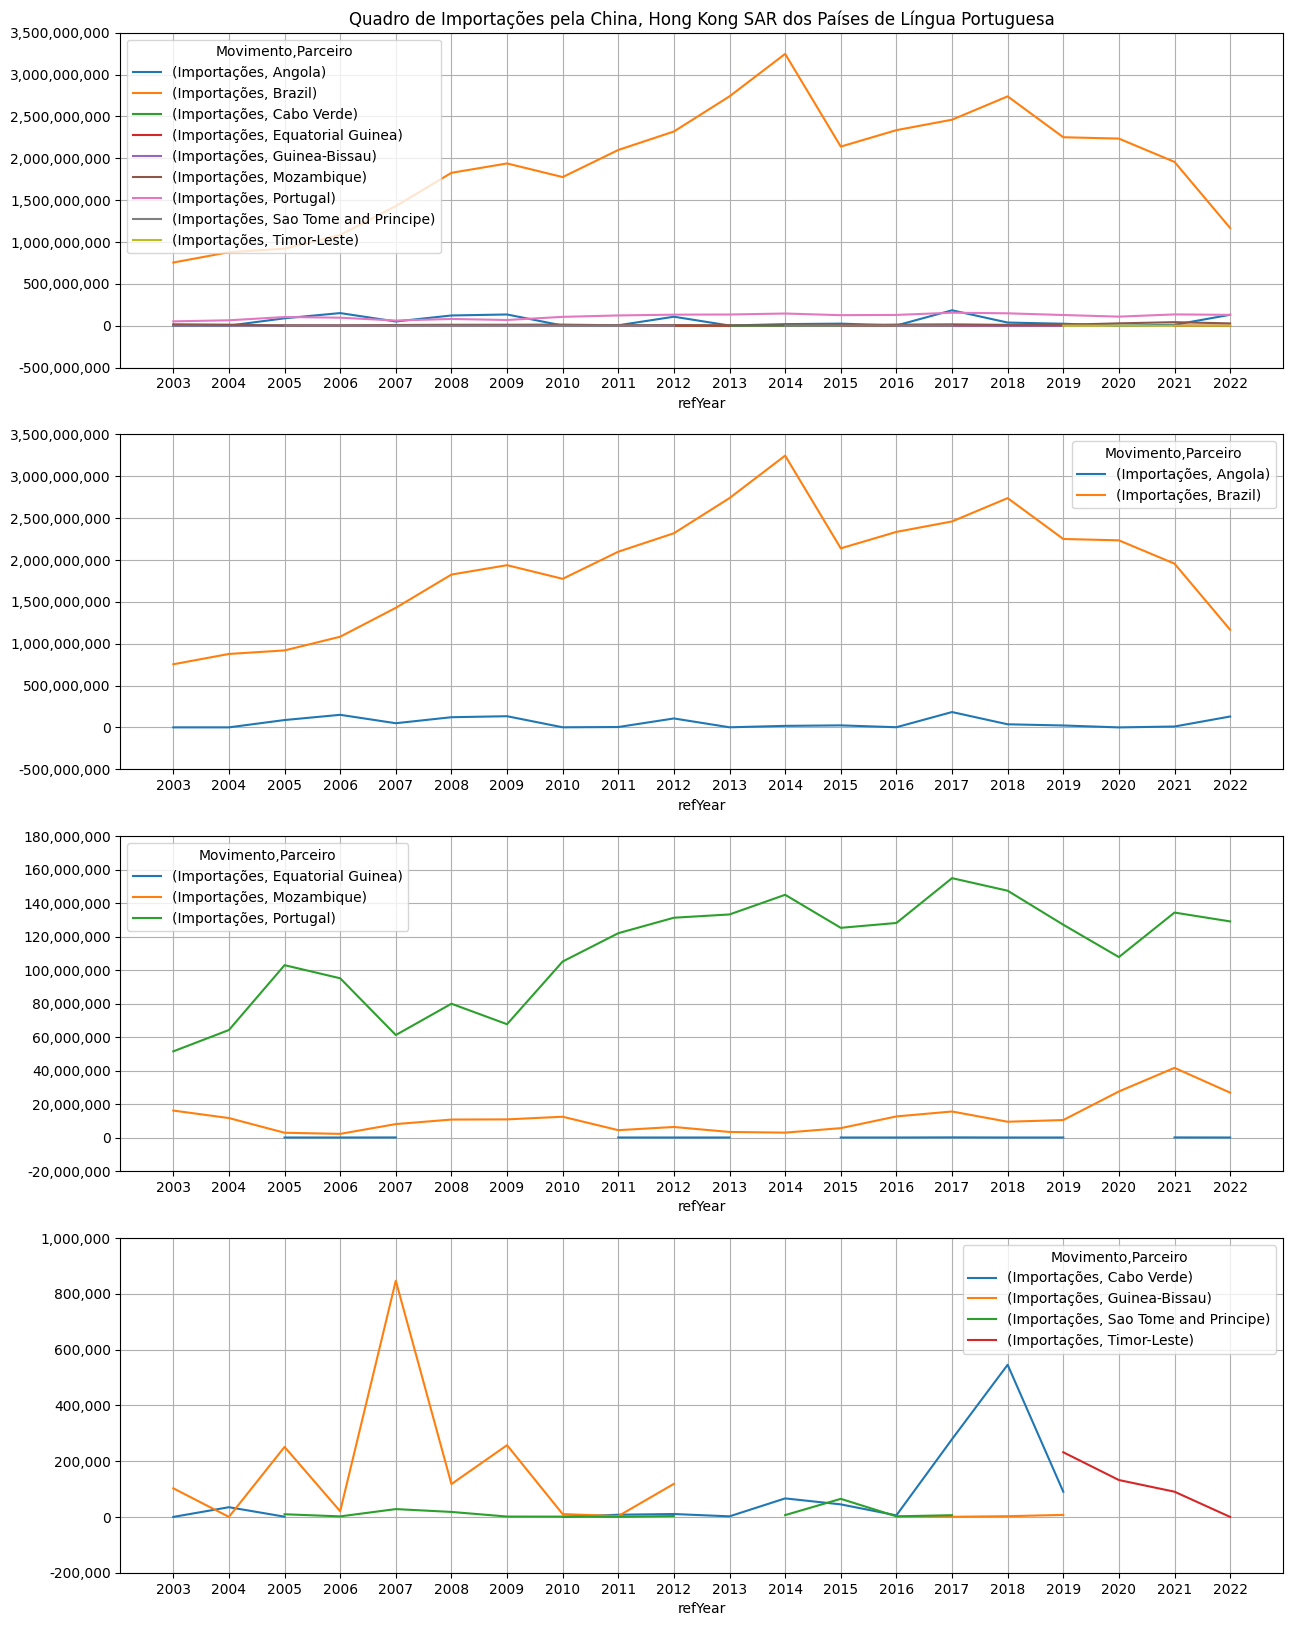

In [15]:
title=f"Quadro de {movimento} pela {comtrade.COUNTRY_CODES[comtrade.m49_hong_kong]} dos Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=False,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/hk_plp_{movimento}.png")

### Gráficos exportações

In [16]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Exportações' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento    Exportações                                                   \
Parceiro          Angola           Brazil    Cabo Verde Equatorial Guinea   
refYear                                                                     
2003       21,581,176.00   570,466,847.00    550,296.00      1,145,794.00   
2004       18,465,732.00   833,781,769.00    352,277.00      3,256,822.00   
2005       28,657,452.00 1,003,761,856.00    646,485.00      2,370,539.00   
2006       32,054,625.00 1,174,894,409.00    133,088.00      2,440,747.00   
2007       43,352,826.00 1,330,590,470.00    109,611.00      1,575,739.00   
2008       64,313,787.00 1,647,493,334.00    156,727.00      1,057,851.00   
2009       54,304,811.00 1,179,708,376.00     57,979.00      1,454,332.00   
2010       31,432,960.00 1,663,439,784.00    476,175.00      3,409,918.00   
2011       34,327,288.00 2,061,940,227.00  2,513,400.00      4,726,962.00   
2012       61,286,012.00 1,977,346,784.00  3,889,779.00      6,372,747.00   
2013       76,933,376.00 1,961,112,483.00  9,758,253.00      1,891,677.00   
2014      155,391,108.00 1,873,981,551.00  5,941,654.00      3,079,624.00   
2015       96,929,344.93 1,375,682,688.82 10,421,027.21      2,395,845.91   
2016       23,181,895.04 1,265,478,231.96  1,626,415.37      1,082,991.33   
2017       26,502,957.33 1,530,155,564.33  5,927,158.81        328,092.45   
2018       31,207,650.88 1,599,878,198.00  1,398,981.25      2,384,581.97   
2019       32,803,146.64 1,870,180,496.63  1,043,127.58      1,408,279.66   
2020       28,552,313.84 2,246,413,194.83    827,061.23        616,938.67   
2021       32,995,755.94 2,503,440,083.41  1,293,328.57        667,897.16   
2022       28,551,778.50 2,352,397,562.64    377,915.64        239,967.30   

Movimento                                                                   \
Parceiro  Guinea-Bissau    Mozambique       Portugal Sao Tome and Principe   
refYear                                                                      
2003          57,824.00  9,363,185.00 120,821,803.00             45,802.00   
2004         129,535.00  4,548,078.00 150,115,081.00            105,791.00   
2005          55,308.00  3,882,481.00 183,347,180.00             41,243.00   
2006          55,903.00  3,809,734.00 180,806,618.00            168,681.00   
2007       4,357,681.00  2,429,957.00 248,311,302.00             17,347.00   
2008         149,225.00  3,822,109.00 273,898,145.00             32,622.00   
2009         467,773.00  5,983,622.00 195,160,858.00              1,406.00   
2010         378,292.00  6,880,515.00 205,592,492.00             82,998.00   
2011       1,448,469.00 18,963,244.00 247,047,527.00            360,806.00   
2012         379,886.00 25,659,997.00 232,591,470.00             35,494.00   
2013         554,984.00 42,745,780.00 230,980,072.00          2,663,705.00   
2014       1,002,980.00 76,799,955.00 282,383,427.00          2,146,760.00   
2015       2,051,001.54 52,454,327.54 253,351,735.21          1,937,662.99   
2016       1,281,654.41 24,128,912.00 310,937,725.40          1,243,564.69   
2017       2,038,054.13 39,524,685.08 340,664,473.75            794,422.18   
2018       2,315,019.82 31,634,988.16 375,081,741.70            819,484.92   
2019         886,984.50 46,552,319.95 316,256,480.81            540,955.14   
2020         497,027.18 25,509,783.09 320,225,948.29            812,187.37   
2021         815,853.41 36,125,275.41 339,710,248.23          1,866,560.32   
2022       1,118,736.34 11,915,332.84 318,053,738.63            216,289.85   

Movimento               
Parceiro   Timor-Leste  
refYear                 
2003               NaN  
2004               NaN  
2005               NaN  
2006               NaN  
2007               NaN  
2008               NaN  
2009               NaN  
2010               NaN  
2011               NaN  
2012               NaN  
2013               NaN  
2014               NaN  
2015               NaN  
2016               NaN  
2017    

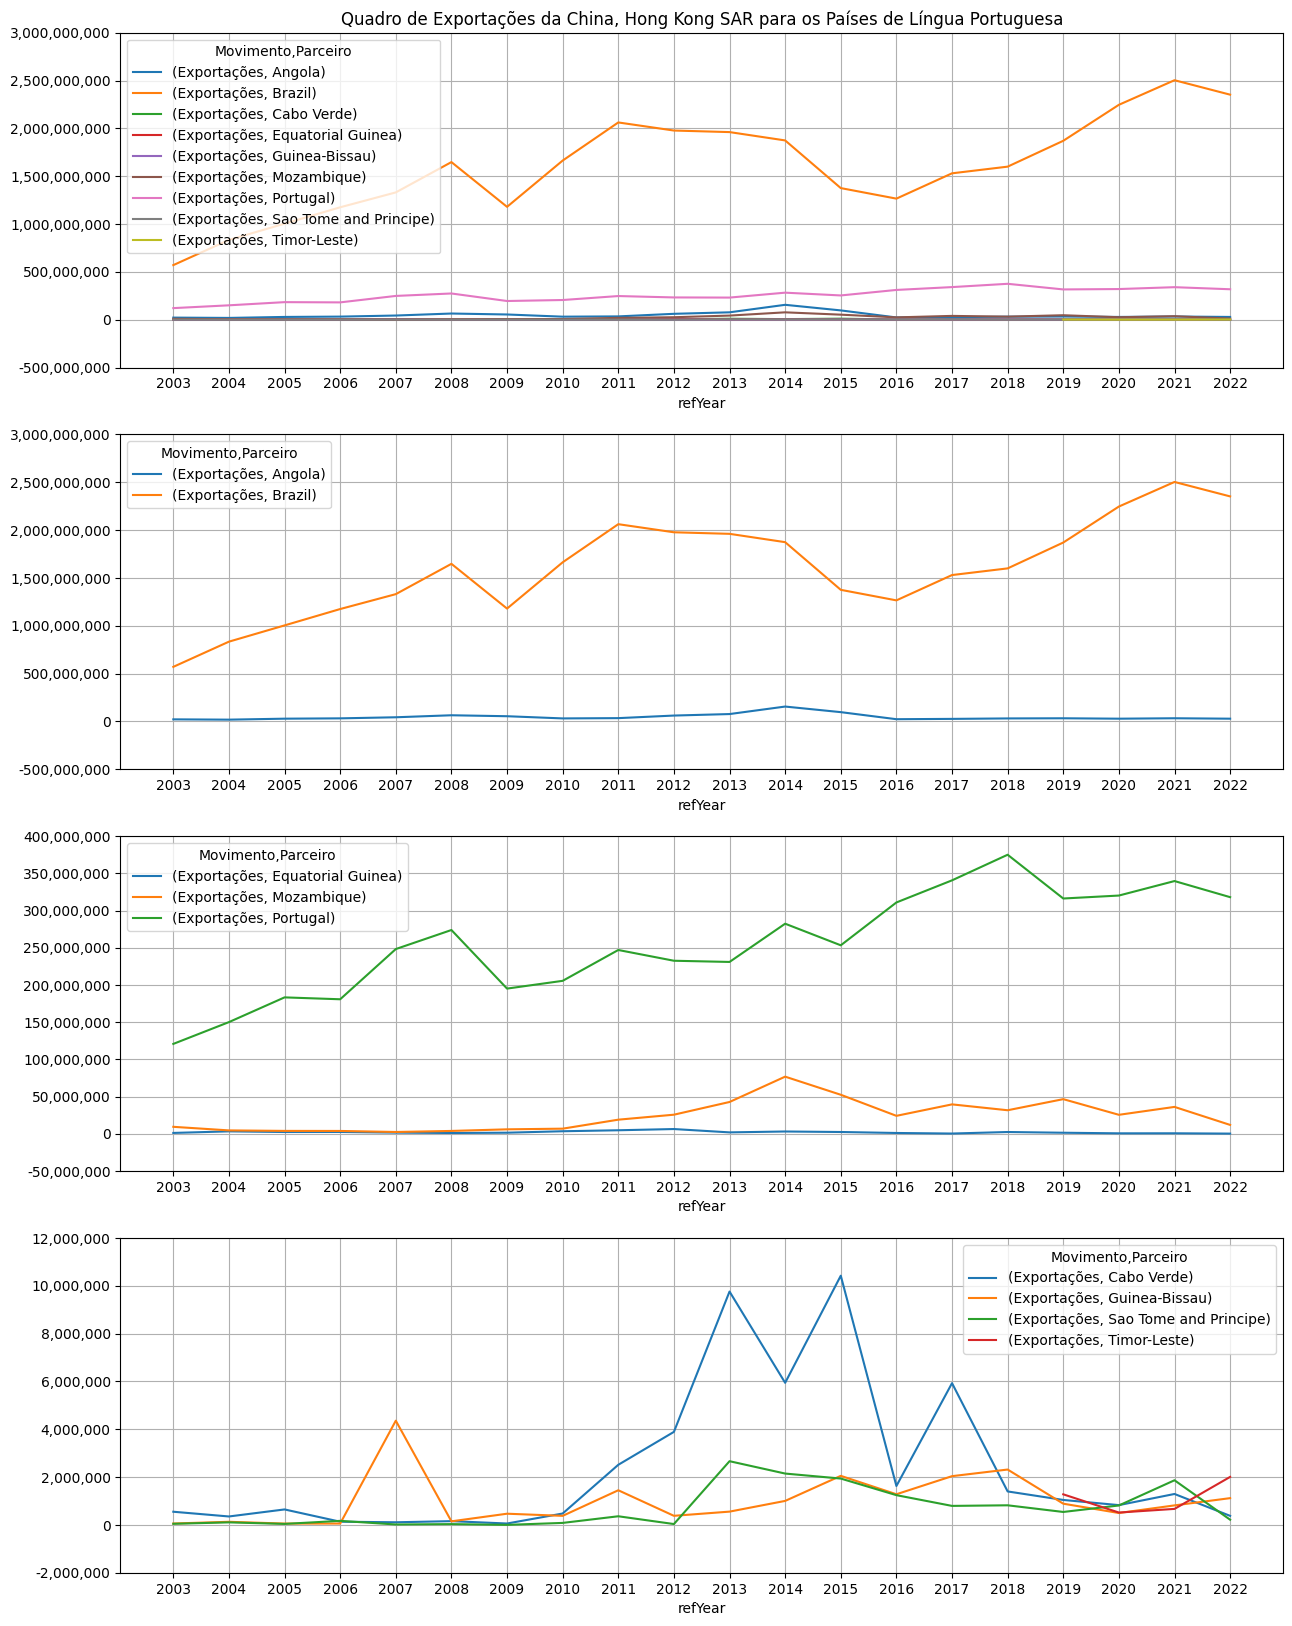

In [19]:
title=f"Quadro de {movimento} da {comtrade.COUNTRY_CODES[comtrade.m49_hong_kong]} para os Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=False,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/hk_plp_{movimento}.png")

### Gráficos saldo (China: exportações-importações)

In [20]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Saldo' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento           Saldo                                                    \
Parceiro           Angola            Brazil    Cabo Verde Equatorial Guinea   
refYear                                                                       
2003        21,058,756.00   -183,819,589.00    550,290.00               NaN   
2004        18,014,082.00    -43,768,198.00    317,428.00               NaN   
2005       -59,226,861.00     84,010,624.00    645,592.00      2,368,144.00   
2006      -118,174,482.00     91,647,926.00           NaN      2,440,647.00   
2007        -6,467,021.00    -98,150,882.00    108,708.00      1,540,021.00   
2008       -57,344,685.00   -178,478,037.00           NaN               NaN   
2009       -79,295,739.00   -758,422,417.00           NaN      1,446,421.00   
2010        30,282,428.00   -111,814,220.00    476,003.00               NaN   
2011        29,849,353.00    -37,267,845.00  2,505,516.00      4,726,491.00   
2012       -45,510,505.00   -342,411,481.00  3,879,387.00      6,372,116.00   
2013        75,576,601.00   -778,941,084.00  9,756,178.00      1,890,646.00   
2014       137,160,940.00 -1,373,133,876.00  5,875,277.00               NaN   
2015        72,815,865.39   -763,727,696.57 10,376,059.73      2,395,575.91   
2016        21,135,863.39 -1,070,399,203.04  1,620,796.10      1,082,142.21   
2017      -156,931,507.92   -930,479,149.68  5,648,496.58        256,408.43   
2018        -5,866,757.10 -1,139,636,487.51    853,615.68      2,381,578.84   
2019         9,980,254.10   -381,034,506.02    952,738.15      1,407,951.17   
2020        28,508,125.77     11,438,507.95           NaN               NaN   
2021        22,584,181.21    546,814,819.55           NaN        618,535.32   
2022      -101,682,677.63  1,185,636,021.55           NaN        239,966.40   

Movimento                                                                    \
Parceiro  Guinea-Bissau     Mozambique       Portugal Sao Tome and Principe   
refYear                                                                       
2003         -44,752.00  -6,728,104.00  69,346,140.00             41,817.00   
2004         129,373.00  -7,071,731.00  85,898,889.00                   NaN   
2005        -195,660.00   1,042,867.00  80,396,487.00             31,662.00   
2006          35,530.00   1,637,368.00  85,683,982.00            166,736.00   
2007       3,511,078.00  -5,588,282.00 187,090,678.00            -10,728.00   
2008          31,356.00  -6,895,001.00 193,971,107.00             14,714.00   
2009         210,631.00  -4,846,409.00 127,486,221.00                 59.00   
2010         368,122.00  -5,527,938.00 100,452,477.00             81,895.00   
2011       1,445,465.00  14,581,130.00 124,991,896.00            360,562.00   
2012         261,274.00  19,369,276.00 101,289,750.00             32,469.00   
2013                NaN  39,437,802.00  97,725,918.00                   NaN   
2014                NaN  73,887,519.00 137,386,363.00          2,140,235.00   
2015                NaN  46,861,221.62 128,091,337.35          1,872,830.72   
2016       1,281,137.93  11,533,639.49 182,777,835.15          1,241,440.82   
2017       2,037,498.13  23,991,479.46 185,726,529.44            788,224.46   
2018       2,312,468.31  22,214,732.60 227,649,743.41                   NaN   
2019         879,679.68  36,118,426.98 189,135,947.73                   NaN   
2020                NaN  -1,991,537.51 212,435,429.61                   NaN   
2021         752,301.88  -5,493,858.16 205,332,105.49                   NaN   
2022                NaN -14,880,668.55 188,961,630.14                   NaN   

Movimento               
Parceiro   Timor-Leste  
refYear                 
2003               NaN  
2004               NaN  
2005               NaN  
2006               NaN  
2007               NaN  
2008               NaN  
2009               NaN  
2010               NaN  
2011               NaN  
2012               NaN  
2013               NaN  
2014          

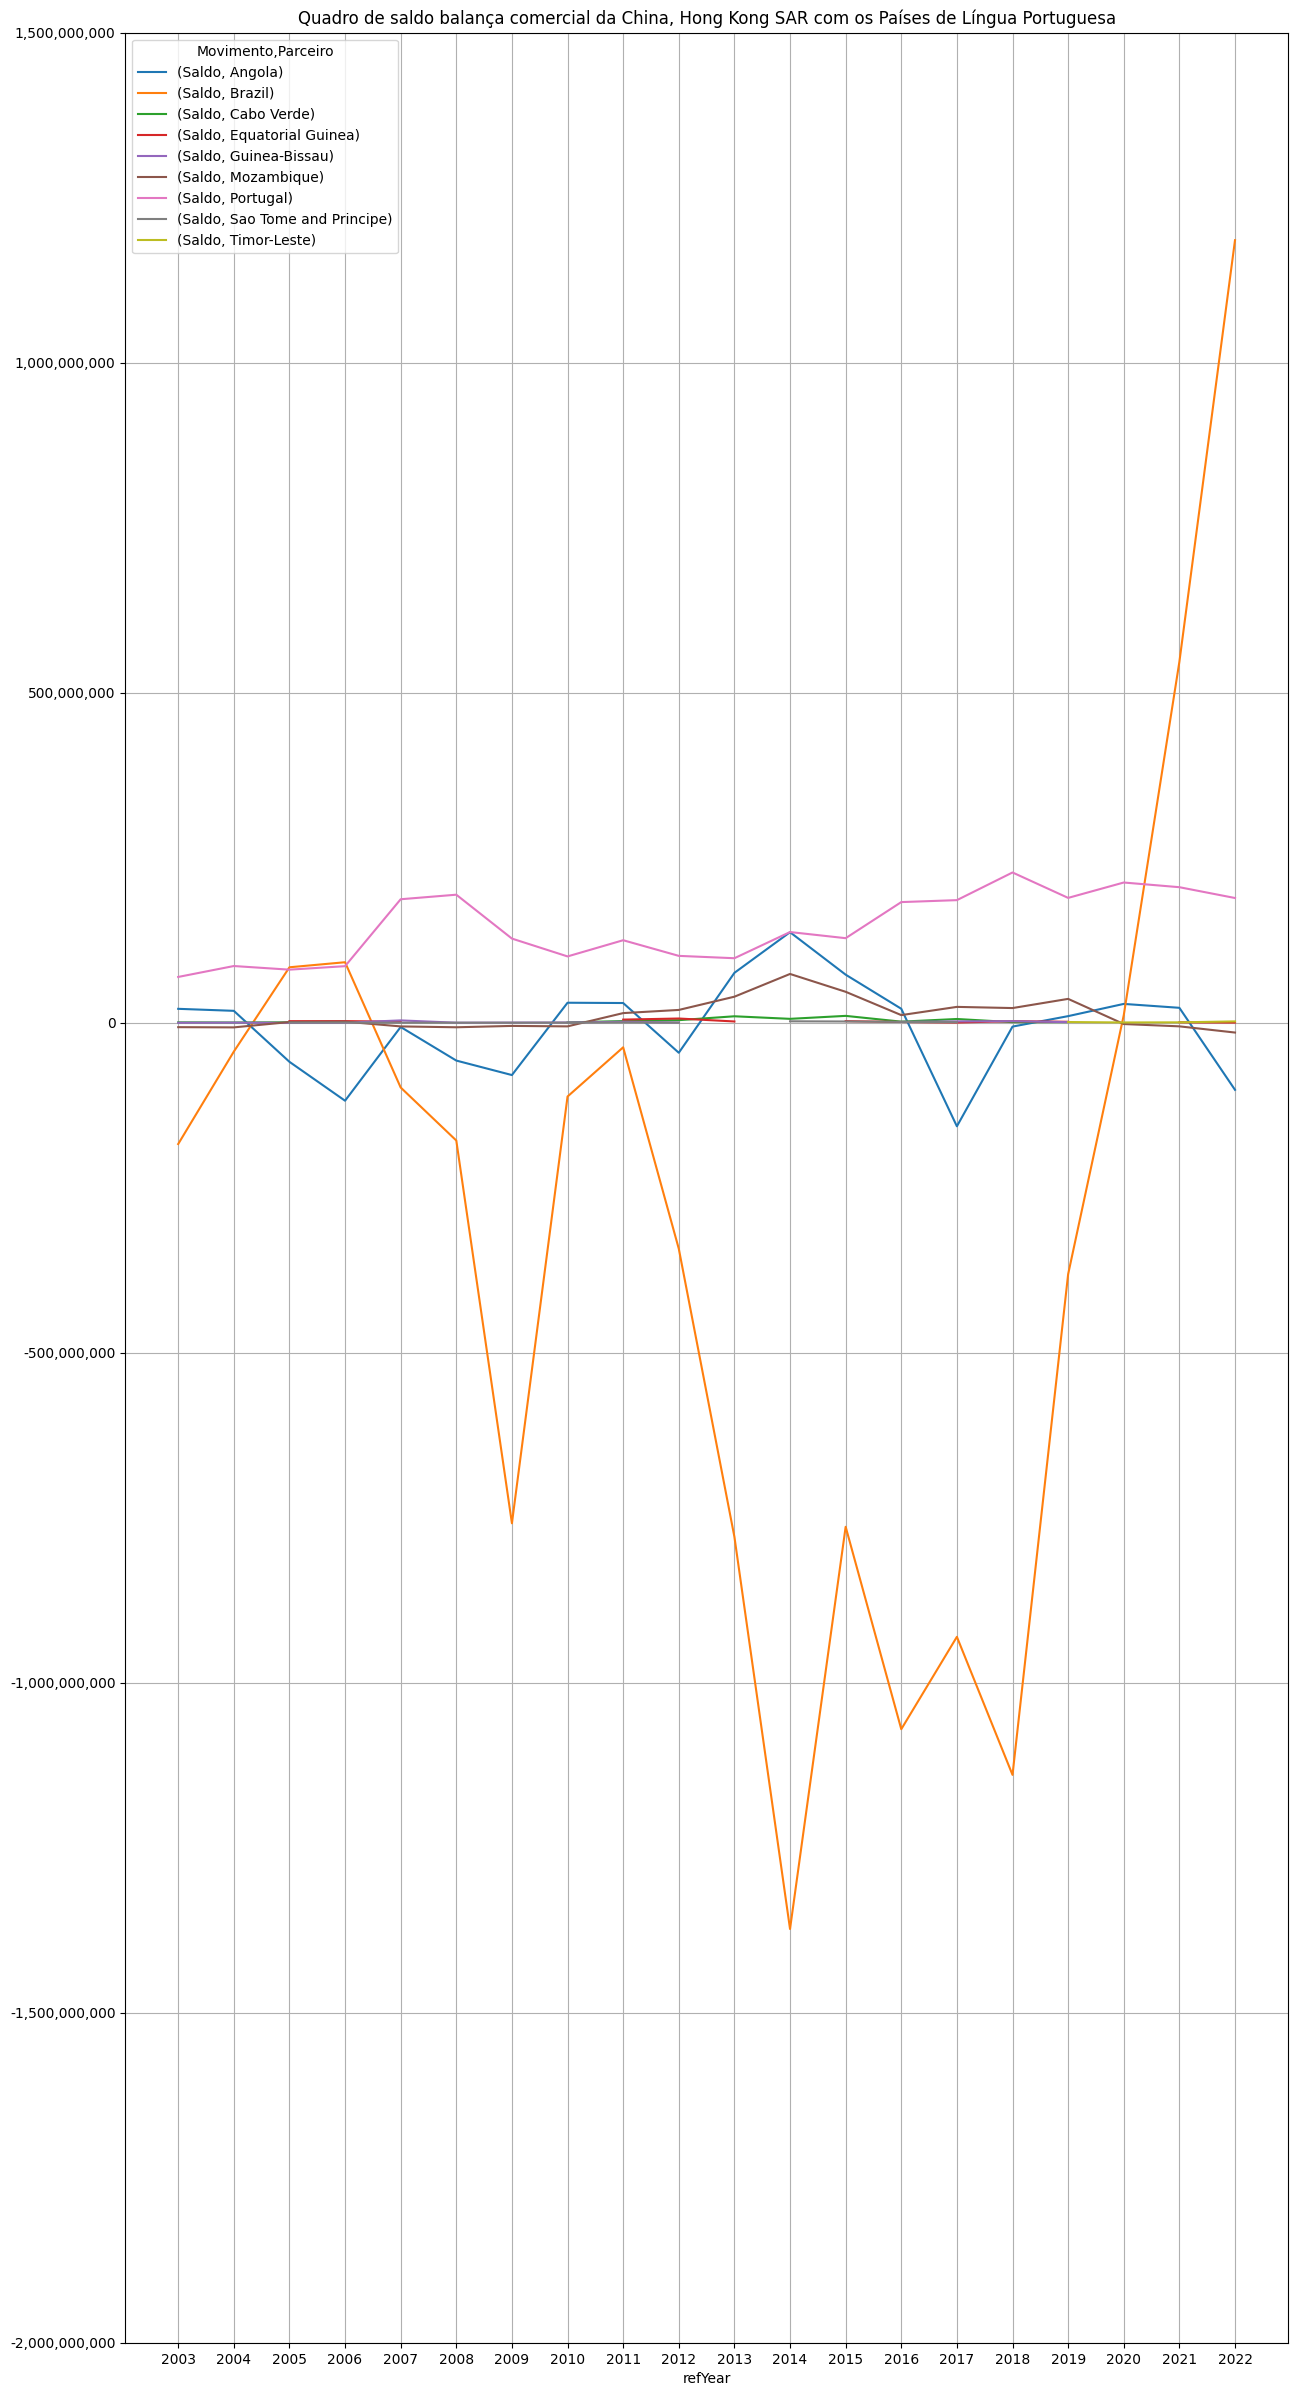

In [21]:
import matplotlib.pyplot as plt

title=f"Quadro de saldo balança comercial da {comtrade.COUNTRY_CODES[comtrade.m49_hong_kong]} com os Países de Língua Portuguesa"
ax = graph_data.plot.line(figsize=(15,30),xticks=graph_data.index.values,title=title)

current_values = ax.get_yticks()
ax.set_yticks(current_values)
ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax.grid()
plt.savefig(f"downloads/hk_plp_{movimento}.png")

In [22]:
import datetime
# print the current date and time


print("Current date and time: ", datetime.datetime.now())

Current date and time:  2023-12-04 07:47:20.601862
